In [1]:
import pandas as pd
import numpy as np
import glob

# **Feature Selection**
I have three target columns for which i will employe relevant techniques to predict the best features

# **Loading Data**
I am lodaing all my csv files into a list

In [60]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

combined_df = pd.read_csv("combined_stock_data.csv")

# Drop the 'Date' column
combined_df_normalized=combined_df.drop(columns=['Date'], inplace=True)

# Separate out the macd_histogram and next_day_macd_histogram columns
macd_histogram = combined_df['macd_histogram']
Next_Day_macd_histogram = combined_df['Next_Day_macd_histogram']
combined_df.drop(columns=['macd_histogram', 'Next_Day_macd_histogram'], inplace=True)

# Normalize numerical columns excluding macd_histogram and next_day_macd_histogram
scaler = MinMaxScaler()
combined_df_normalized = scaler.fit_transform(combined_df.select_dtypes(include=['float64', 'int64']))

# Convert normalized array back to DataFrame
combined_df_normalized = pd.DataFrame(combined_df_normalized, columns=combined_df.select_dtypes(include=['float64', 'int64']).columns)

# Concatenate normalized DataFrame with macd_histogram and next_day_macd_histogram
combined_df_normalized['macd_histogram'] = macd_histogram.values
combined_df_normalized['Next_Day_macd_histogram'] = Next_Day_macd_histogram.values

# Display the normalized combined dataframe
display(combined_df_normalized.head())


,Open,High,Low,Close,Adj Close,Volume,sma_50,ema_50,sma_200,ema_200,rsi,macd,signal,Next_Day_Close,Next_Day_rsi,macd_histogram,Next_Day_macd_histogram
0,0.137920,0.140526,0.139093,0.140923,0.149350,0.055437,0.146695,0.145086,0.137510,0.141892,0.617499,0.599909,0.589251,0.143224,0.641722,0.560030,0.827646
1,0.141626,0.142949,0.142656,0.143224,0.151792,0.049471,0.146754,0.145256,0.137621,0.142012,0.641722,0.604786,0.591849,0.143745,0.695305,0.827646,0.994980
2,0.143386,0.143553,0.144306,0.143745,0.152345,0.037838,0.146834,0.145441,0.137726,0.142137,0.695305,0.609062,0.594973,0.143974,0.680079,0.994980,1.070549
3,0.143500,0.143438,0.144044,0.143974,0.152588,0.039783,0.146913,0.145629,0.137858,0.142263,0.680079,0.612590,0.598334,0.143151,0.798345,1.070549,1.017745
4,0.144416,0.144000,0.144853,0.143151,0.151715,0.038139,0.146909,0.145774,0.137960,0.142378,0.798345,0.614662,0.601529,0.143099,0.767012,1.017745,0.932152


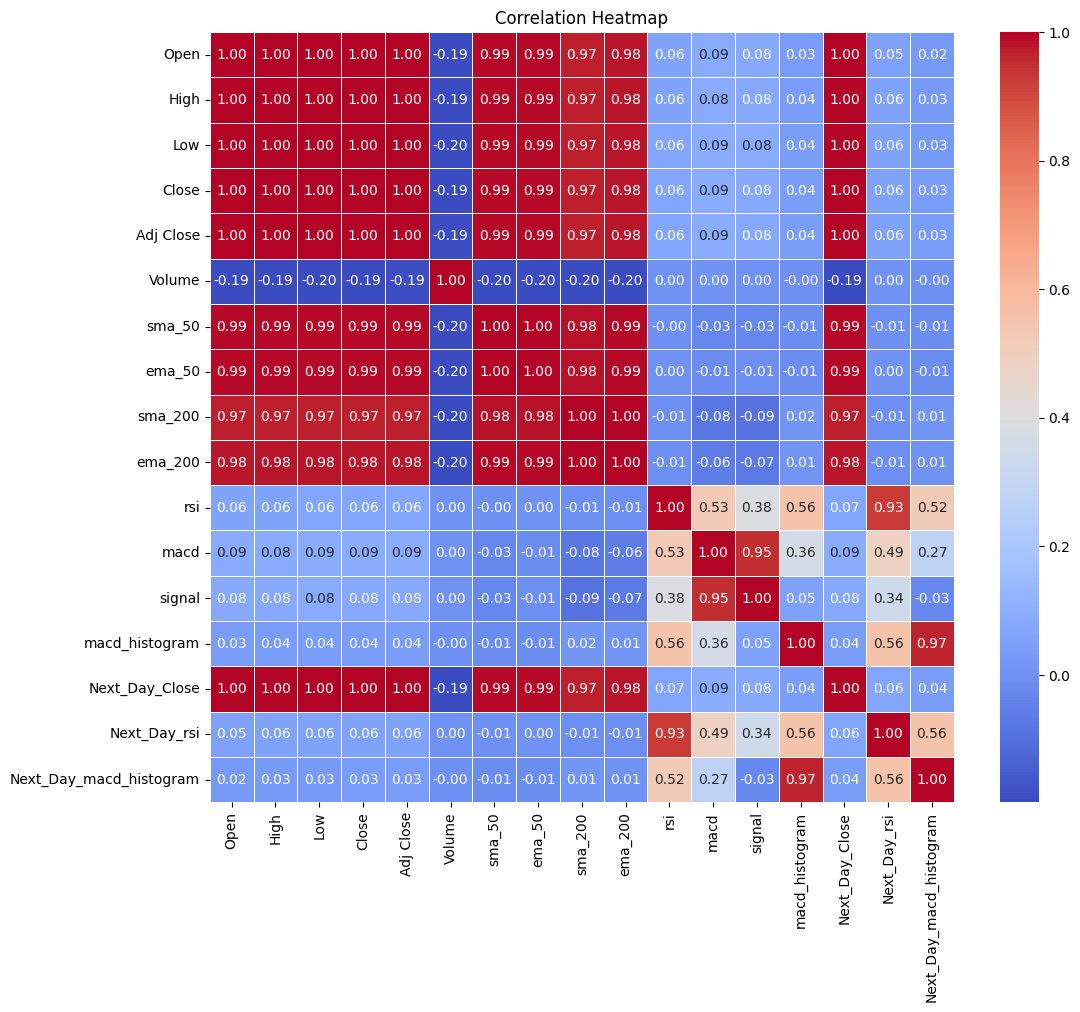

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame with numeric and encoded categorical columns
# Assuming combined_df contains your actual data

# Calculate correlation matrix
correlation_matrix = combined_df_normalized.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


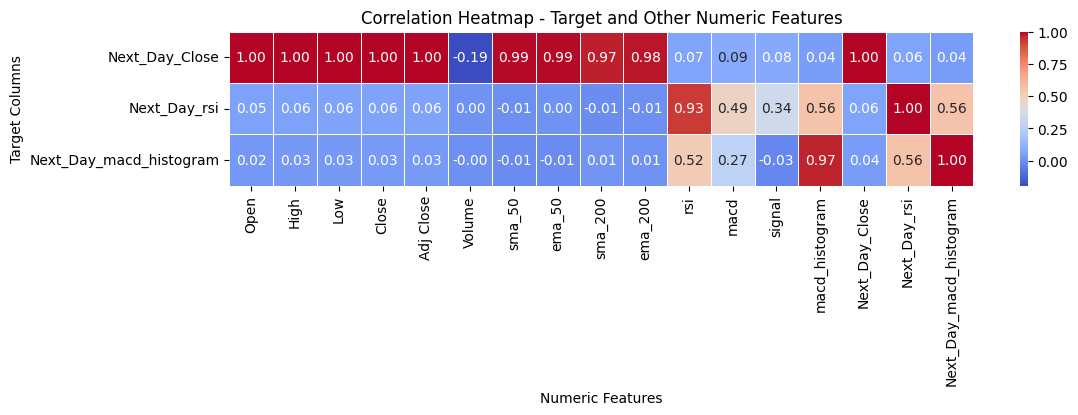

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame with numeric and encoded categorical columns
# Assuming combined_df contains your actual data

# Calculate correlation matrix
correlation_matrix = combined_df_normalized.corr()

# List of target columns
target_columns = ['Next_Day_Close','Next_Day_rsi','Next_Day_macd_histogram']



# Plotting the heatmap with target columns on y-axis and numeric columns on x-axis
plt.figure(figsize=(12, 2))
sns.heatmap(correlation_matrix.loc[target_columns, correlation_matrix.columns],
            annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap - Target and Other Numeric Features')
plt.xlabel('Numeric Features')
plt.ylabel('Target Columns')
plt.show()


In [1]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# List of target columns
target_columns = ['Next_Day_Close','Next_Day_rsi','Next_Day_macd_histogram']

# Iterate over each target variable
for target in target_columns:
    # Separate features and target variable
    y = combined_df_normalized[target]  # Current target variable
    X = combined_df_normalized.drop(target_columns, axis=1)  # Features excluding the current target

    # Initialize Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)

    # Fit the model
    rf.fit(X, y)

    # Get feature importances
    feature_importances = rf.feature_importances_

    # Sort feature importances in descending order
    indices = feature_importances.argsort()[::-1]

    # Plotting feature importances
    plt.figure(figsize=(12, 6))
    plt.title(f"Feature Importances for {target}")
    plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.tight_layout()
    plt.show()


NameError: name 'combined_df_normalized' is not defined

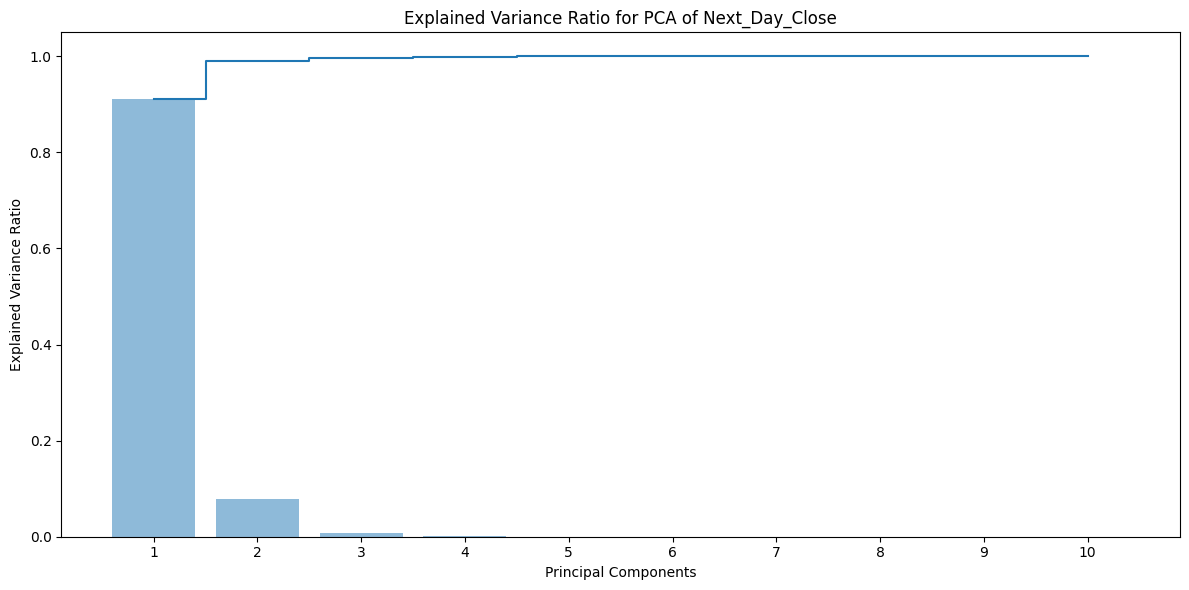

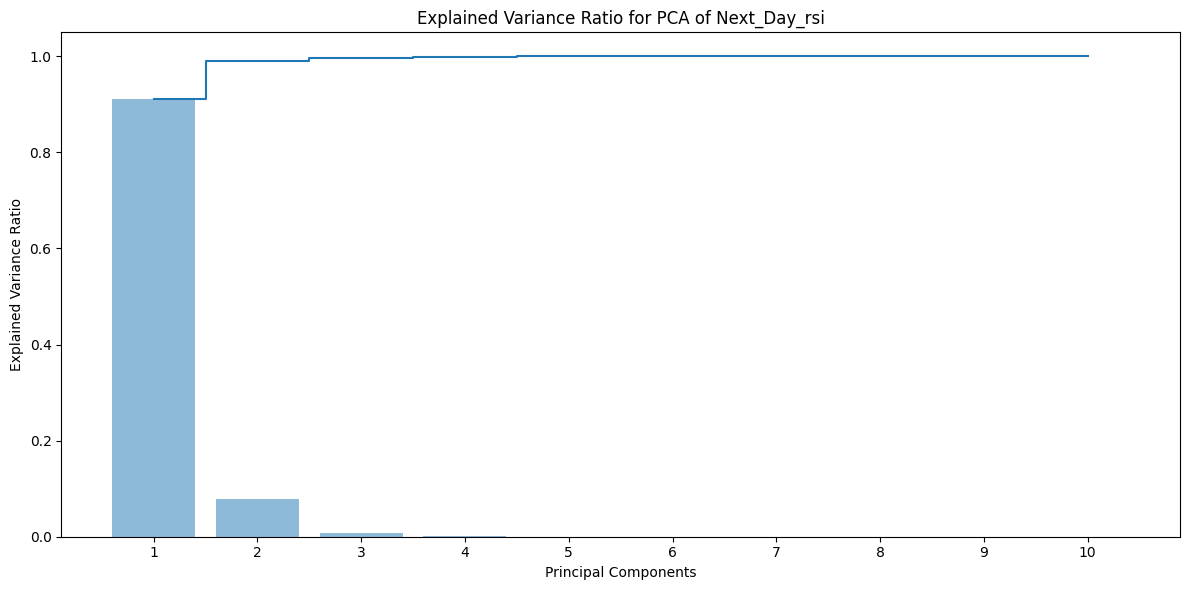

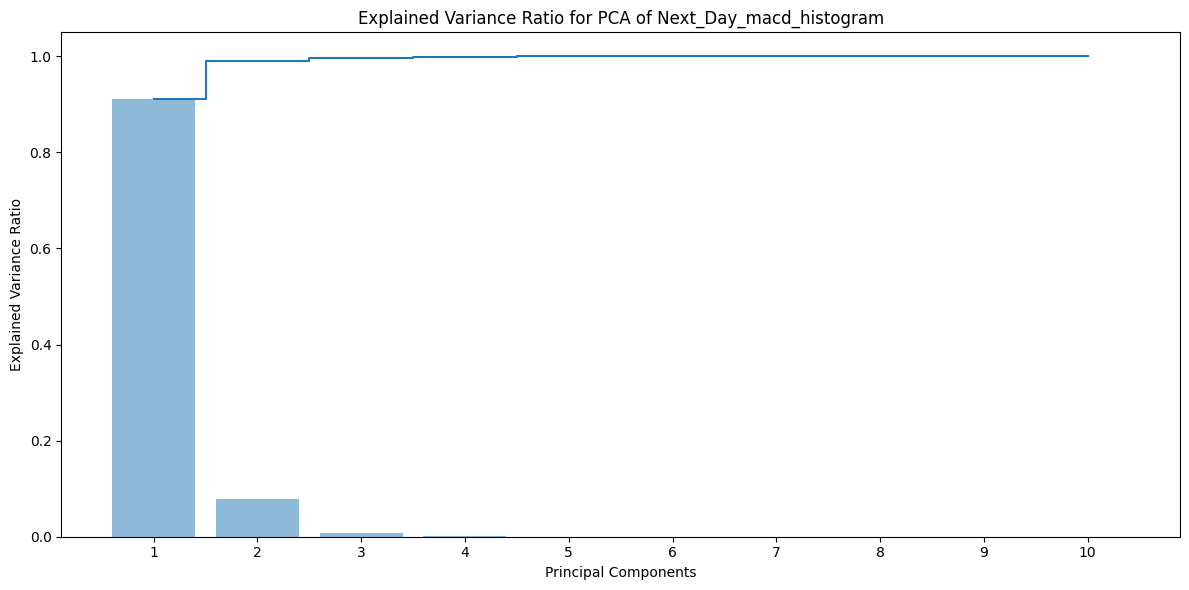

In [61]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# List of target columns
target_columns = ['Next_Day_Close', 'Next_Day_rsi', 'Next_Day_macd_histogram']

# Iterate over each target variable
for target in target_columns:
    # Separate features and target variable
    y = combined_df_normalized[target]  # Current target variable
    X = combined_df_normalized.drop(target_columns, axis=1)  # Features excluding the current target



    # Initialize PCA model
    pca = PCA(n_components=10)  # You can adjust n_components based on your data and requirements

    # Fit PCA and transform the data
    X_pca = pca.fit_transform(X)

    # saving numpy array
    # np.save(target+'X_pca.npy', X_pca)

    # Plot explained variance ratio
    plt.figure(figsize=(12, 6))
    plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
    plt.step(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), where='mid')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio for PCA of {}'.format(target))
    plt.xticks(range(1, pca.n_components_ + 1))
    plt.tight_layout()
    plt.show()

    # Optionally, you can also analyze the principal components themselves
    # and their correlations with the original features if needed.


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

# Assuming X_pca and y_train are already defined
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict using the model
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Optionally, print Mean Squared Error (MSE) as you did before
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



R-squared: 0.9629334123200346
Mean Absolute Error: 0.17331335158906921
Mean Squared Error: 0.09953978367684416
